## Setup

In [23]:
# Standard imports
import cv2 as cv
import cv2
import numpy as np
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def process_img()
im = np.load(open("Results/3/0_0.npy", "rb"))
x,y = np.gradient(im)
im=(x**2+y**2)**0.5
im = 255*(im - np.min(im))/np.ptp(im)
clip_val = 40
im[im<clip_val] = 0
im = im.astype(np.uint8)
resize_factor = 5
im = cv2.resize(im, dsize=(32*resize_factor,24*resize_factor), interpolation=cv2.INTER_CUBIC)
sns.heatmap(im)
plt.show()
# plt.imshow(im)

# Find Canny edges 
# edged = cv2.Canny(im, 30, 200) 
edged = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
cv2.waitKey(0)
sns.heatmap(edged)

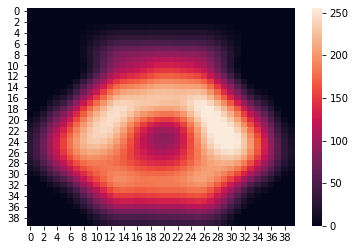

In [22]:
sns.heatmap(crop(im, 20))

---
## Find blobs
### Load img

In [229]:
def load_img(rock_id, ratio, seconds):
    img = np.load(open("Results" + str(rock_id) + "/" + str(ratio) +"_"+ str(seconds) + ".npy", "rb"))

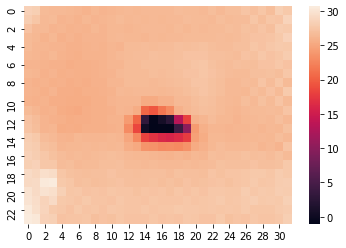

In [223]:
# Standard imports
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import seaborn as sns

im = np.load(open("Results/1/0_0.npy", "rb"))
# im = 255*(im - min(im.flatten())) / (max(im.flatten())-min(im.flatten()))
# clip_val = 90
# im[im<clip_val] = 0
# im = im.astype(np.uint8)
sns.heatmap(im)
plt.show()

-1.035253298528744 26.348136467104894 30.675300358560282


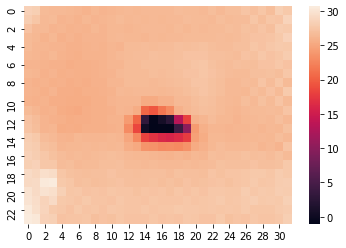

-93.61188437409776 17.656155189609976 92.02590107568085


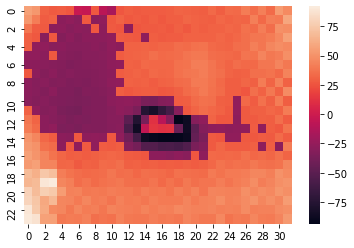

In [235]:
def increase_contrast(img, max_factor):
    mean = np.mean(img)
    max_diff = img.max() - mean
    assert max_factor>1
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            i = img[row,col]
            diff = abs(i-mean)
            normalized_factor = 1+max_factor*diff/max_diff
            if i < mean:
                normalized_factor *= -1
            
            i *= normalized_factor
            img[row,col] = np.clip(i, img.min()*max_factor, img.max()*max_factor)
    return img

im = np.load(open("Results/1/0_0.npy", "rb"))
print(im.min(), np.mean(im), im.max())
sns.heatmap(im)
plt.show()
increased = increase_contrast(im, 2)
print(increased.min(), np.mean(increased), increased.max())
sns.heatmap(increased)
im = np.load(open("Results/1/0_0.npy", "rb"))

### Resize

In [208]:
# s = 2 #resize factor
# res = cv2.resize(increased, dsize=(32*s,24*s), interpolation=cv2.INTER_CUBIC)
# sns.heatmap(res)
# plt.show()

### Crop

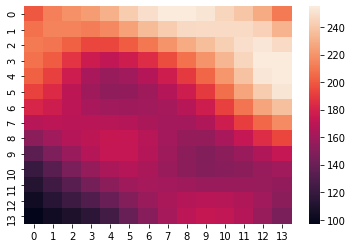

NameError: name 'increased' is not defined

In [6]:
def crop(img, pixel_range = 5):
    x,y = img.shape
    mid_x, mid_y = int(x/2), int(y/2)
    row_indices = range(mid_x-pixel_range, mid_x+pixel_range)
    col_indices = range(mid_y-pixel_range, mid_y+pixel_range)
    cropped = []
    for row in row_indices:
        to_add = []
        cropped.append([])
        for col in col_indices:
            to_add.append(img[row, col])
        cropped[-1] = np.array(to_add)
    return np.array(cropped)
cropped = crop(im, 7)
sns.heatmap(cropped)
plt.show()
cropped = crop(increased, 7)
sns.heatmap(cropped)
plt.show()

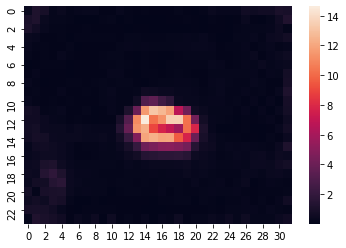

In [237]:
# Norm gradient
x,y = np.gradient(im)
grad=(x**2+y**2)**0.5
sns.heatmap(grad, linewidths=0)

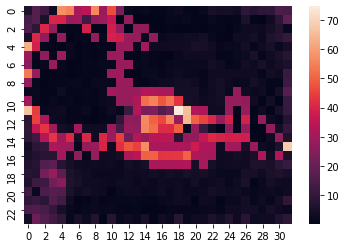

In [238]:
# Norm gradient
x,y = np.gradient(increased)
sns.heatmap((x**2+y**2)**0.5, linewidths=0)

### Detect

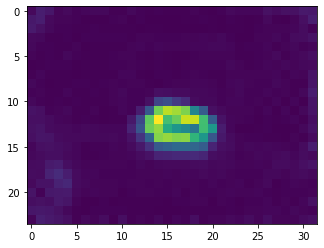

In [241]:
im = grad
im = 255*(im - min(im.flatten())) / (max(im.flatten())-min(im.flatten()))
im = im.astype(np.uint8)
plt.imshow(im)

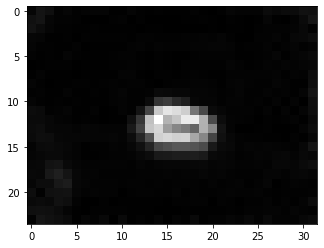

In [245]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 100
# params.minDistBetweenBlobs = 4

# Filter by Area.
params.filterByArea = True
# params.minArea = 4
# params.maxArea = 50

# Filter by Circularity
# params.filterByCircularity = True
# params.minCircularity = 0.1

# Filter by Convexity
# params.filterByConvexity = True
# params.minConvexity = 0.5
# params.maxConvexity = 1

# Filter by Inertia
# params.filterByInertia = True
# params.minInertiaRatio = 0.1
# params.maxInertiaRatio = 0.7

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)

---
## AlexNet

In [75]:
# ! python3 -m pip install 'torchvision>=0.5.0'
import torch as t
import torchvision.models as models
net = models.alexnet(pretrained=True)

In [76]:
# cim = np.stack((im,)*3, axis=-1)
cim = np.array([im, im, im])
cim=t.Tensor(cim).unsqueeze(0)
cim.shape

torch.Size([1, 3, 200, 200])

torch.Size([5, 5])


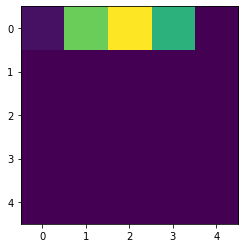

In [77]:
out = net.features(cim)[0][11]
print(out.shape)
plt.imshow(out.detach().numpy())

---
## Blob example

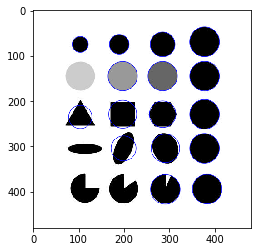

In [335]:
# Read image
im = cv2.imread("blob.jpg", cv2.IMREAD_GRAYSCALE)
 
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)